In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
df = pd.read_csv("../Data/sydney_airbnb.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [2]:
included_columns = ["price", "city", "longitude", "latitude", "review_scores_rating", "number_of_reviews", 
                    "minimum_nights","security_deposit","cleaning_fee", "accommodates", "bathrooms", "bedrooms", "beds",
                    "property_type","room_type","availability_365" ,"host_identity_verified",  "host_is_superhost", 
                    "host_since", "cancellation_policy"] 

df = df[included_columns]
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [3]:
df.shape

(27070, 20)

In [4]:
price_list = ["price","cleaning_fee","security_deposit"]

for col in price_list:
    df[col] = df[col].fillna('0')
    df[col] = df[col].apply(lambda x: float(x.replace('$', '').replace(',', '')) if len(x) > 0 else 0)

df['host_since'] = pd.to_datetime(df['host_since'])

In [5]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,2009-05-14,strict_14_with_grace_period
2,469.0,Balgowlah,151.261722,-33.800929,100.0,1,5,900.0,100.0,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,2009-11-20,strict_14_with_grace_period
3,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,2009-11-30,moderate
4,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,2009-11-30,moderate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
price                     27070 non-null float64
city                      27037 non-null object
longitude                 27070 non-null float64
latitude                  27070 non-null float64
review_scores_rating      19512 non-null float64
number_of_reviews         27070 non-null int64
minimum_nights            27070 non-null int64
security_deposit          27070 non-null float64
cleaning_fee              27070 non-null float64
accommodates              27070 non-null int64
bathrooms                 27048 non-null float64
bedrooms                  27062 non-null float64
beds                      27037 non-null float64
property_type             27070 non-null object
room_type                 27070 non-null object
availability_365          27070 non-null int64
host_identity_verified    27035 non-null object
host_is_superhost         27035 non-null object
host_since            

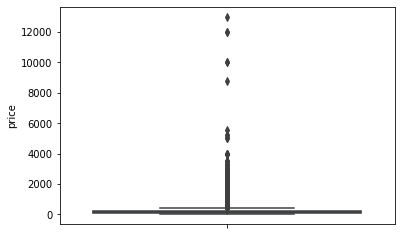

In [7]:
import seaborn as sns

sns.boxplot(y=df['price'])

In [8]:
print(df["price"].quantile(0.995))
print(df["price"].mean())
print(df["price"].median())

1600.0
209.27879571481344
135.0


In [9]:
df = df[df["price"] < df["price"].quantile(0.995)].reset_index(drop=True)

In [10]:
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [11]:
print(df["cancellation_policy"].value_counts(), "\n\n")
print(df["city"].value_counts(), "\n\n")
print(df["property_type"].value_counts(), "\n\n")
print(df["room_type"].value_counts(), "\n\n")

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64 


Bondi Beach               1671
Manly                      958
Surry Hills                919
Bondi                      785
Randwick                   684
                          ... 
Cartwright                   1
Roseville Chase              1
Rozelle Sydney               1
Ïõ¨Ìä∏ÏõåÏä§ Ìè¨Ïù∏Ìä∏       1
riverwood                    1
Name: city, Length: 741, dtype: int64 


Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
Servic

In [12]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [13]:
df.drop(index=25882, axis=0, inplace=True)

In [14]:
df.head(2)

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,2009-05-14,strict_14_with_grace_period


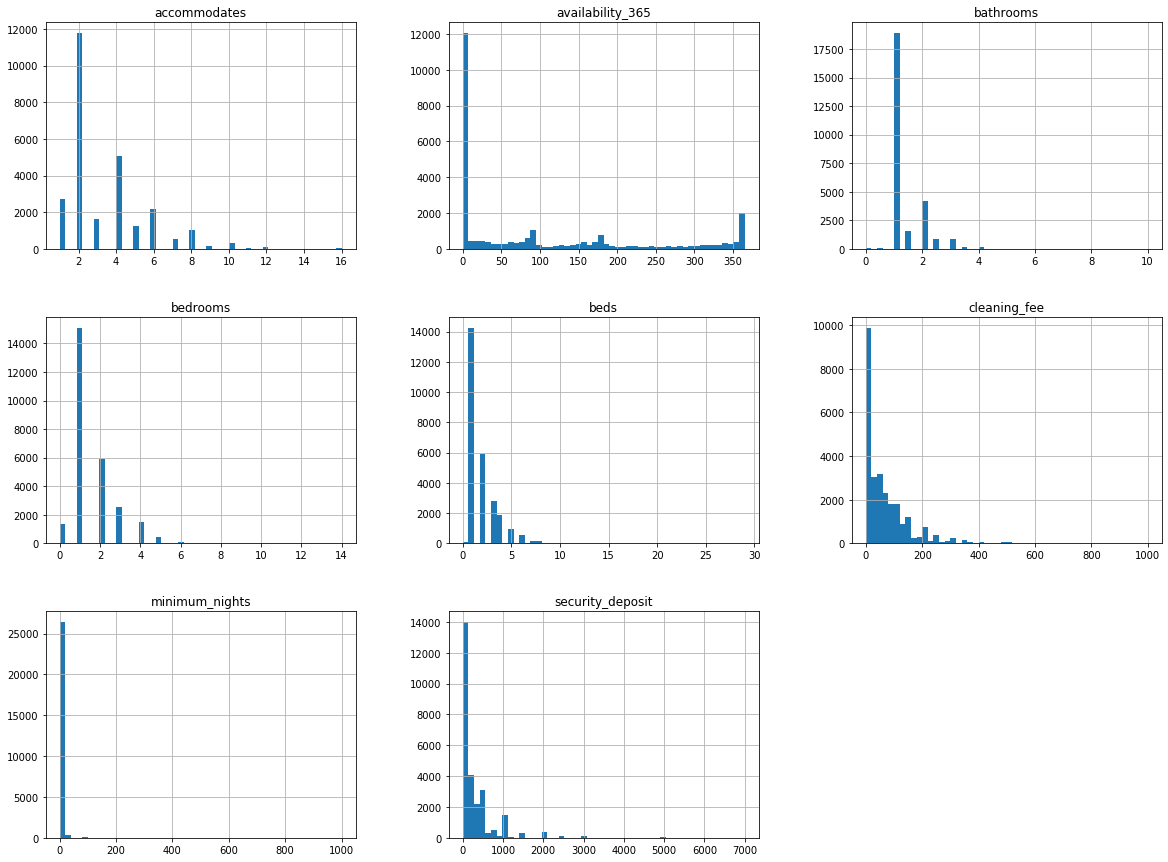

In [15]:
df.iloc[:, 6:].hist(bins=50, figsize=(20, 15))
plt.show()

In [16]:
df["city"].value_counts().head(10)

Bondi Beach     1671
Manly            958
Surry Hills      919
Bondi            785
Randwick         684
Sydney           682
Coogee           675
Darlinghurst     660
North Bondi      629
Newtown          490
Name: city, dtype: int64

In [17]:
city_idxs = list(df["city"].value_counts().head(10).index)
df = df[df["city"].isin(city_idxs)].reset_index(drop=True)

In [18]:
df["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Bungalow                 7
Tent                     6
Cottage                  6
Boutique hotel           6
Tiny house               5
Resort                   5
Hotel                    3
Cabin                    2
Earth house              1
Chalet                   1
Aparthotel               1
Yurt                     1
Camper/RV                1
Houseboat                1
Name: property_type, dtype: int64

In [19]:
item_counts = df.groupby(['property_type']).size()
rares = list(item_counts.loc[item_counts <= 10].index)
df = df[~df["property_type"].isin(rares)].reset_index(drop=True)
df["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Name: property_type, dtype: int64

In [20]:
df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x == "t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x == "t" else 0)

In [21]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["city_code"] = le.fit_transform(df["city"])

In [22]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,3
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,1,1,2010-08-14,strict_14_with_grace_period,1
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,1,0,2010-04-26,strict_14_with_grace_period,0
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,1,0,2010-04-26,strict_14_with_grace_period,6
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,1,1,2012-01-18,strict_14_with_grace_period,1


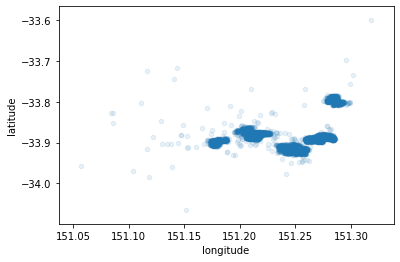

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [24]:
df = df[(df["longitude"] > 151.16) & (df["latitude"] < -33.75)].reset_index(drop=True)
df = df[df["latitude"] > -33.95].reset_index(drop=True)
df = df[df["price"] < 600].reset_index(drop=True)

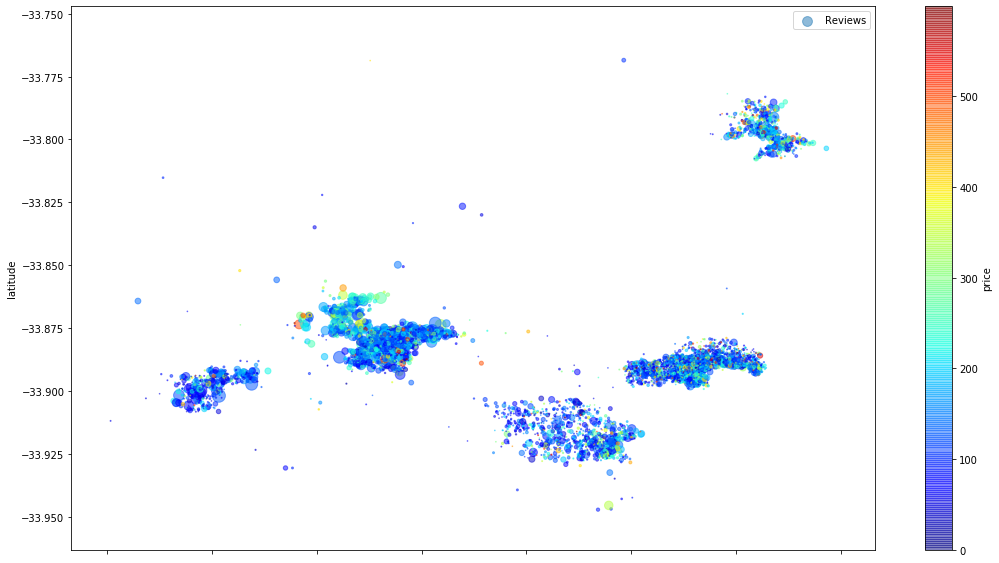

In [25]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=df["number_of_reviews"]/2, label="Reviews", 
        figsize=(18, 10), c="price", cmap=plt.get_cmap("jet"), colorbar=True)

Text(0.5, 1, 'Heatmap of Correlation Matrix')

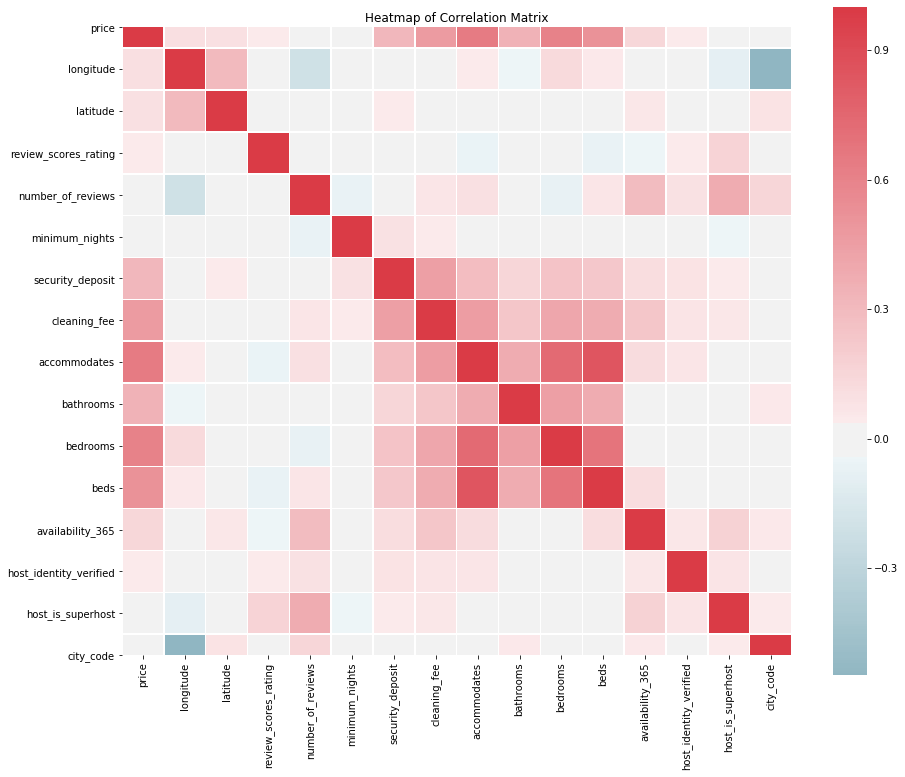

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, cmap=cmap, 
            vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [27]:
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
accommodates              0.638820
bedrooms                  0.600832
beds                      0.519610
cleaning_fee              0.470969
bathrooms                 0.349875
security_deposit          0.321627
availability_365          0.144770
longitude                 0.106163
latitude                  0.103192
host_identity_verified    0.048235
review_scores_rating      0.042633
minimum_nights            0.027224
host_is_superhost         0.015807
city_code                -0.011728
number_of_reviews        -0.015843
Name: price, dtype: float64

In [28]:
df.head(2)

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,3
1,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,1,0,2010-04-26,strict_14_with_grace_period,0


In [29]:
df["bedrooms_per_person"] = df["bedrooms"] / df["accommodates"]
df["bathrooms_per_person"] = df["bathrooms"] / df["accommodates"]
df["days_on_airbnb"] = (pd.to_datetime('today') - df['host_since']).dt.days

In [30]:
df.head(2)

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,3,0.5,0.50,3981.0
1,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,1,0,2010-04-26,strict_14_with_grace_period,0,0.5,0.25,3571.0


In [31]:
nulls = df[df.isnull().any(axis=1)].head()
nulls

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
26,299.0,North Bondi,151.283481,-33.882376,NaN,0,7,500.0,150.0,4,1.0,2.0,2.0,House,Entire home/apt,180,1,0,2011-10-29,strict_14_with_grace_period,6,0.5,0.25,3020.0
34,275.0,Darlinghurst,151.220949,-33.877342,NaN,0,14,950.0,100.0,2,NaN,1.0,1.0,Apartment,Private room,0,1,0,2011-05-12,strict_14_with_grace_period,3,0.5,NaN,3190.0
36,76.0,Bondi,151.262760,-33.889664,NaN,0,5,250.0,250.0,1,2.0,2.0,3.0,Apartment,Private room,363,0,0,2011-02-12,strict_14_with_grace_period,0,2.0,2.00,3279.0
62,300.0,Darlinghurst,151.220405,-33.876723,NaN,0,3,0.0,0.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,0,0,0,2012-04-26,strict_14_with_grace_period,3,0.5,0.25,2840.0
65,401.0,Coogee,151.253918,-33.921539,NaN,0,10,1000.0,0.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,0,0,2012-03-05,strict_14_with_grace_period,2,0.5,0.50,2892.0


In [32]:
nulls.drop(["review_scores_rating"], axis=1, inplace=True)

In [33]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

cat_cols = ["city", "cancellation_policy", "host_since", "room_type", "property_type", "host_since"]
df_cat = df.select_dtypes(include=[object])
df_num = df.drop(cat_cols, axis=1)
print(df_cat.head())
df_num.head()

           city property_type        room_type          cancellation_policy
0  Darlinghurst     Apartment     Private room  strict_14_with_grace_period
1         Bondi     Apartment  Entire home/apt  strict_14_with_grace_period
2   North Bondi     Apartment  Entire home/apt  strict_14_with_grace_period
3   Bondi Beach     Apartment  Entire home/apt  strict_14_with_grace_period
4        Sydney     Apartment  Entire home/apt  strict_14_with_grace_period


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
0,111.0,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,285,1,0,3,0.5,0.50,3981.0
1,190.0,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,233,1,0,0,0.5,0.25,3571.0
2,225.0,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,152,1,0,6,0.5,0.25,3571.0
3,130.0,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,94,1,1,1,0.5,0.50,2939.0
4,111.0,151.268865,-33.885690,89.0,11,4,0.0,100.0,4,1.0,2.0,2.0,14,0,0,9,0.5,0.25,3339.0


In [34]:
imputer.fit(df_num)
df_np = imputer.transform(df_num)

In [35]:
df_num = pd.DataFrame(df_np, columns=df_num.columns, index=list(df_num.index.values))

In [36]:
df_num.loc[nulls.index.values]

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
26,299.0,151.283481,-33.882376,96.0,0.0,7.0,500.0,150.0,4.0,1.0,2.0,2.0,180.0,1.0,0.0,6.0,0.5,0.25,3020.0
34,275.0,151.220949,-33.877342,96.0,0.0,14.0,950.0,100.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.5,0.50,3190.0
36,76.0,151.262760,-33.889664,96.0,0.0,5.0,250.0,250.0,1.0,2.0,2.0,3.0,363.0,0.0,0.0,0.0,2.0,2.00,3279.0
62,300.0,151.220405,-33.876723,96.0,0.0,3.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.25,2840.0
65,401.0,151.253918,-33.921539,96.0,0.0,10.0,1000.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.5,0.50,2892.0


In [37]:
df_cat.drop(['city'], axis=1, inplace=True)
df_cat.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,property_type,room_type,cancellation_policy
0,Apartment,Private room,strict_14_with_grace_period
1,Apartment,Entire home/apt,strict_14_with_grace_period
2,Apartment,Entire home/apt,strict_14_with_grace_period
3,Apartment,Entire home/apt,strict_14_with_grace_period
4,Apartment,Entire home/apt,strict_14_with_grace_period


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_cat['property_type'] = LabelEncoder().fit_transform(df_cat['property_type'])
df_cat['room_type'] = LabelEncoder().fit_transform(df_cat['room_type'])
df_cat['cancellation_policy'] = LabelEncoder().fit_transform(df_cat['cancellation_policy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [39]:
property_type = df_cat['property_type'].values.reshape(-1, 1)
property_type = OneHotEncoder().fit_transform(property_type).toarray()

room_type = df_cat['room_type'].values.reshape(-1, 1)
room_type = OneHotEncoder().fit_transform(room_type).toarray()

cancellation_policy = df_cat['cancellation_policy'].values.reshape(-1, 1)
cancellation_policy = OneHotEncoder().fit_transform(cancellation_policy).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [40]:
pt_cols = ['Apartment', 'House', 'Townhouse', 'Condominium', 'Loft', 'Guest suite', 'Other', 'Hostel', 
           'Bed and breakfast', 'Guesthouse', 'Serviced apartment', 'Villa']
rt_cols = ['Entire home/apt', 'Private room', 'Shared room']
cp_cols = ['strict_14_with_grace_period', 'flexible', 'moderate', 'super_strict_60']

df_pt = pd.DataFrame(data=property_type, columns=pt_cols)
df_rt = pd.DataFrame(data=room_type, columns=rt_cols)
df_cp = pd.DataFrame(data=cancellation_policy, columns=cp_cols)

df_cat = pd.concat([df_pt, df_rt, df_cp], axis=1)
df_cat.head()

,Apartment,House,Townhouse,Condominium,Loft,Guest suite,Other,Hostel,Bed and breakfast,Guesthouse,Serviced apartment,Villa,Entire home/apt,Private room,Shared room,strict_14_with_grace_period,flexible,moderate,super_strict_60
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb,Apartment,House,Townhouse,Condominium,Loft,Guest suite,Other,Hostel,Bed and breakfast,Guesthouse,Serviced apartment,Villa,Entire home/apt,Private room,Shared room,strict_14_with_grace_period,flexible,moderate,super_strict_60
0,111.0,151.216541,-33.880455,88.0,272.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,285.0,1.0,0.0,3.0,0.5,0.50,3981.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,190.0,151.271029,-33.897393,94.0,12.0,2.0,500.0,150.0,4.0,1.0,2.0,3.0,233.0,1.0,0.0,0.0,0.5,0.25,3571.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,225.0,151.283553,-33.889633,79.0,16.0,2.0,500.0,130.0,4.0,1.0,2.0,2.0,152.0,1.0,0.0,6.0,0.5,0.25,3571.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,130.0,151.273084,-33.891846,95.0,119.0,4.0,200.0,60.0,2.0,1.0,1.0,1.0,94.0,1.0,1.0,1.0,0.5,0.50,2939.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,111.0,151.268865,-33.885690,89.0,11.0,4.0,0.0,100.0,4.0,1.0,2.0,2.0,14.0,0.0,0.0,9.0,0.5,0.25,3339.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train.reshape(-1, 1))

x_train = x_scaler.transform(x_train)
y_train = y_scaler.transform(y_train.reshape(-1, 1))
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
results = lin_reg.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, results)
mse

0.45588562105125097

In [47]:
some_data = df.iloc[:5, 1:]
some_labels = df.iloc[:5, :1]

preds = y_scaler.inverse_transform(lin_reg.predict(x_scaler.transform(some_data)))
res = some_labels.copy()
res['preds'] = preds
res['diff'] = res['preds'] - res['price']

In [48]:
res

,price,preds,diff
0,111.0,44.888911,-66.111089
1,190.0,249.445314,59.445314
2,225.0,232.169562,7.169562
3,130.0,141.544562,11.544562
4,111.0,213.591850,102.591850


In [49]:
from sklearn.svm import SVR

svm = SVR(kernel='poly')
svm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
results = svm.predict(x_test)

In [51]:
some_data = df.iloc[:5, 1:]
some_labels = df.iloc[:5, :1]

preds = y_scaler.inverse_transform(svm.predict(x_scaler.transform(some_data)))
res = some_labels.copy()
res['preds'] = preds
res['diff'] = res['preds'] - res['price']

In [52]:
res

,price,preds,diff
0,111.0,100.173236,-10.826764
1,190.0,222.245354,32.245354
2,225.0,200.506004,-24.493996
3,130.0,119.168308,-10.831692
4,111.0,167.082970,56.082970
